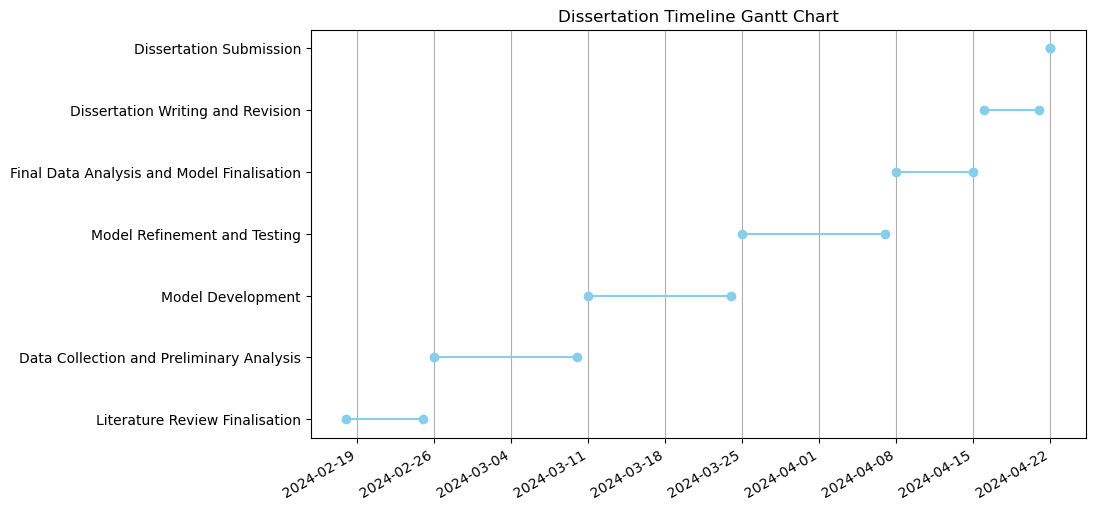

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates

# Define the tasks and their start and end dates
tasks = {
    "Literature Review Finalisation": ("2024-02-18", "2024-02-25"),
    "Data Collection and Preliminary Analysis": ("2024-02-26", "2024-03-10"),
    "Model Development": ("2024-03-11", "2024-03-24"),
    "Model Refinement and Testing": ("2024-03-25", "2024-04-07"),
    "Final Data Analysis and Model Finalisation": ("2024-04-08", "2024-04-15"),
    "Dissertation Writing and Revision": ("2024-04-16", "2024-04-21"),
    "Dissertation Submission": ("2024-04-22", "2024-04-22")
}

# Convert tasks into a DataFrame
df = pd.DataFrame(tasks).T.reset_index()
df.columns = ['Task', 'Start', 'End']
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])
df['Duration'] = df['End'] - df['Start']

# Sort tasks by start date
df = df.sort_values(by='Start')

# Plotting
plt.figure(figsize=(10, 6))
plt.hlines(y=df['Task'], xmin=df['Start'], xmax=df['End'], color='skyblue')
plt.plot(df['Start'], df['Task'], 'o', color='skyblue')
plt.plot(df['End'], df['Task'], 'o', color='skyblue')

# Improve layout
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.gcf().autofmt_xdate() # Rotation
plt.title('Dissertation Timeline Gantt Chart')
plt.grid(axis='x')

plt.show()



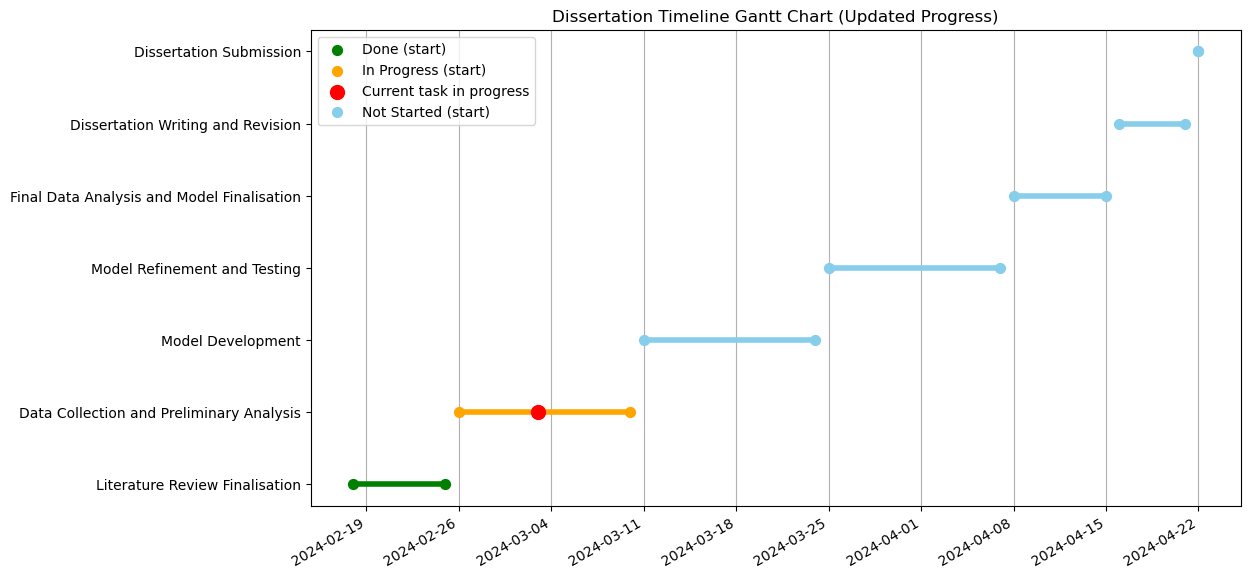

In [4]:
import datetime

# Mark the current date and calculate the halfway point for "Data Collection and Preliminary Analysis"
current_date = datetime.datetime(2024, 2, 25)
data_collection_halfway = current_date + (pd.to_datetime("2024-03-10") - current_date) / 2


# Adjust the DataFrame to correctly mark completed tasks and the in-progress task with its halfway point
df['Status'] = df.apply(lambda row: 'Done' if row['Task'] == "Literature Review Finalisation" or 
                        (row['Task'] == "Data Collection and Preliminary Analysis" and row['End'] <= data_collection_halfway) else
                        ('In Progress' if row['Task'] == "Data Collection and Preliminary Analysis" and row['End'] > data_collection_halfway else
                        ('Not Started' if row['End'] > current_date else 'Done')), axis=1)

# Plotting with corrected status colors and halfway point
plt.figure(figsize=(12, 7))
for status, color in zip(['Done', 'In Progress', 'Not Started'], ['green', 'orange', 'skyblue']):
    subset = df[df['Status'] == status]
    plt.hlines(y=subset['Task'], xmin=subset['Start'], xmax=subset['End'], color=color, lw=4)
    plt.scatter(subset['Start'], subset['Task'], color=color, s=50, label=f'{status} (start)', zorder=5)
    plt.scatter(subset['End'], subset['Task'], color=color, s=50, zorder=5)
    if status == 'In Progress':
        plt.scatter(data_collection_halfway, "Data Collection and Preliminary Analysis", color='red', s=100, zorder=5, label='Current task in progress')

# Improve layout
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.gcf().autofmt_xdate() # Rotation
plt.title('Dissertation Timeline Gantt Chart (Updated Progress)')
plt.legend()
plt.grid(axis='x')

plt.show()
